# EDA COMPLETO 

In [133]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

# modelado
from sklearn.model_selection import train_test_split

# escalado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

# selecicon
from sklearn.feature_selection import f_classif, SelectKBest

#Regresion Logistica
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.utils.class_weight import compute_class_weight





In [134]:
df = pd.read_csv('https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [135]:
df.shape
print("El dataframe tiene 41.188 filas y 21 columnas")


El dataframe tiene 41.188 filas y 21 columnas


In [136]:
df.info()
print("todas las columnas y filas no tienen nulos")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [137]:
#Duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

print("existen 12 duplicados en el dataframe, se procede a eliminarlos")


12
existen 12 duplicados en el dataframe, se procede a eliminarlos


In [138]:
df_duplicados = df[duplicados]
df= df.drop_duplicates()
print ("Se eliminan los 12 duplicados")

Se eliminan los 12 duplicados


In [139]:
#Eliminacion de atributos no relevantes
df.drop(["contact", "default", "month", "day_of_week", "campaign", "emp.var.rate", "pdays", "previous", "cons.price.idx", "cons.conf.idx", "nr.employed", "poutcome", "euribor3m"], axis = 1, inplace = True)
print("Se elimina la columnas irrelevantes con el analisis para un modelo de ML relacionado\na los clientes mas atractivos para un deposito a largo plazo\nLa columna default tiene 20% de informacion desconocida y marital ")
df.head()

Se elimina la columnas irrelevantes con el analisis para un modelo de ML relacionado
a los clientes mas atractivos para un deposito a largo plazo
La columna default tiene 20% de informacion desconocida y marital 


,age,job,marital,education,housing,loan,duration,y
0,56,housemaid,married,basic.4y,no,no,261,no
1,57,services,married,high.school,no,no,149,no
2,37,services,married,high.school,yes,no,226,no
3,40,admin.,married,basic.6y,no,no,151,no
4,56,services,married,high.school,no,yes,307,no


In [140]:
print("El dataframe solo tiene una columna numerica y el la edad, las 5 restantes son categoricas")
df.describe()


El dataframe solo tiene una columna numerica y el la edad, las 5 restantes son categoricas


,age,duration
count,41176.00000,41176.000000
mean,40.02380,258.315815
std,10.42068,259.305321
min,17.00000,0.000000
25%,32.00000,102.000000
50%,38.00000,180.000000
75%,47.00000,319.000000
max,98.00000,4918.000000


In [141]:
#Analisis Univariante

df.info()

print("Hay 2 variables numericas y 5 categoricas.\n De las variables categoricas; marital y job son nominales\ny education es ordinario y housing, loan son binarias")

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41176 non-null  int64 
 1   job        41176 non-null  object
 2   marital    41176 non-null  object
 3   education  41176 non-null  object
 4   housing    41176 non-null  object
 5   loan       41176 non-null  object
 6   duration   41176 non-null  int64 
 7   y          41176 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.8+ MB
Hay 2 variables numericas y 5 categoricas.
 De las variables categoricas; marital y job son nominales
y education es ordinario y housing, loan son binarias


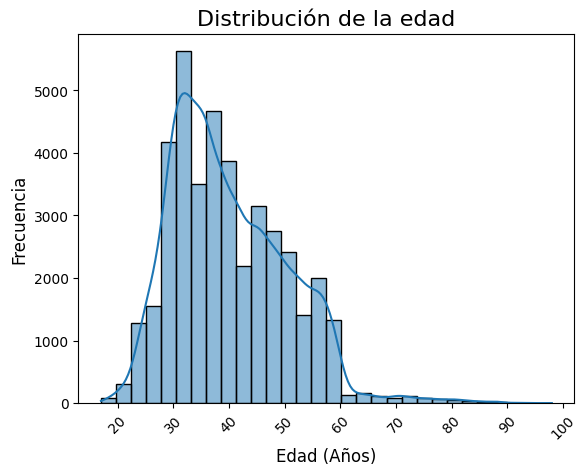

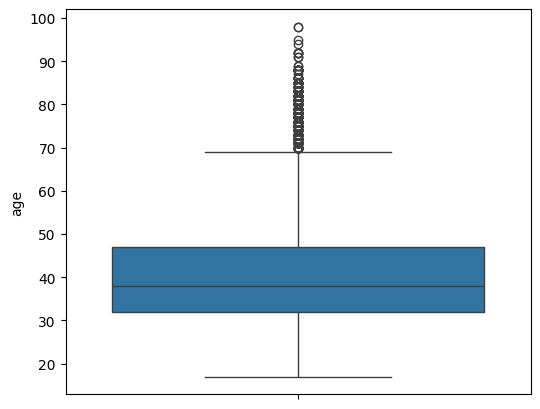

age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
91       2
98       2
95       1
87       1
94       1
Name: count, Length: 78, dtype: int64

In [142]:
sns.histplot(data=df, x='age', bins=30, kde=True)

plt.title(f'Distribución de la edad', fontsize=16)
plt.xlabel('Edad (Años)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(ax=ax, data=df, y="age") 
plt.show()

df.age.value_counts()

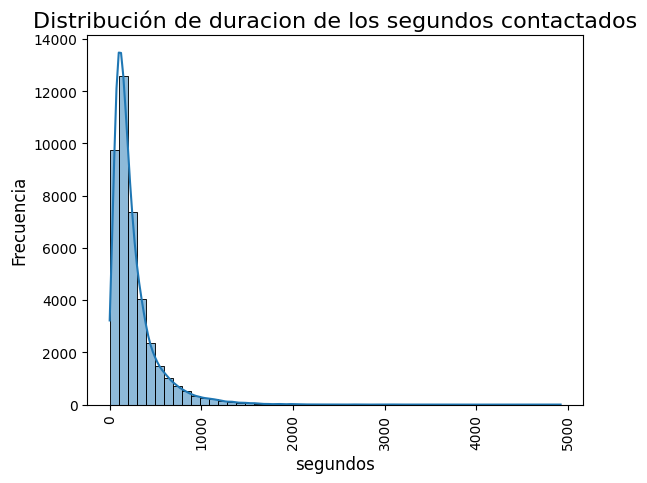

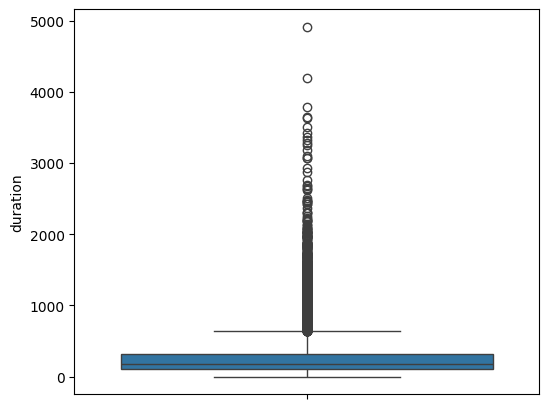

duration
90      170
85      170
136     168
73      167
124     163
       ... 
2055      1
1962      1
1104      1
1551      1
1580      1
Name: count, Length: 1544, dtype: int64

In [143]:
sns.histplot(data=df, x='duration', bins=50, kde=True)

plt.title(f'Distribución de duracion de los segundos contactados', fontsize=16)
plt.xlabel('segundos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
sns.boxplot(ax=ax, data=df, y="duration") 
plt.show()

df.duration.value_counts()


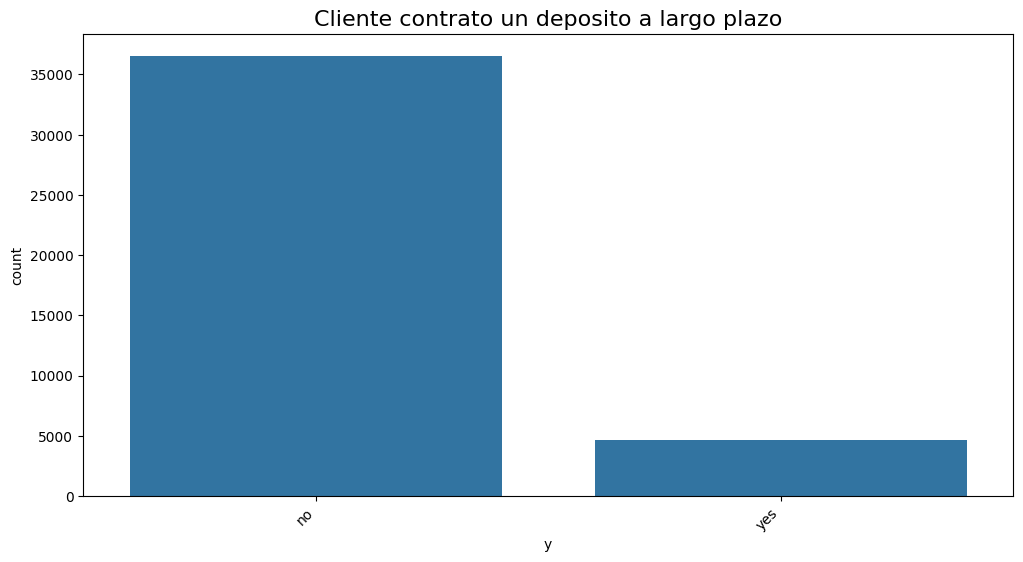

y
no     36537
yes     4639
Name: count, dtype: int64

In [144]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='y', order=df['y'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Cliente contrato un deposito a largo plazo', fontsize=16)
plt.show()

df.y.value_counts()

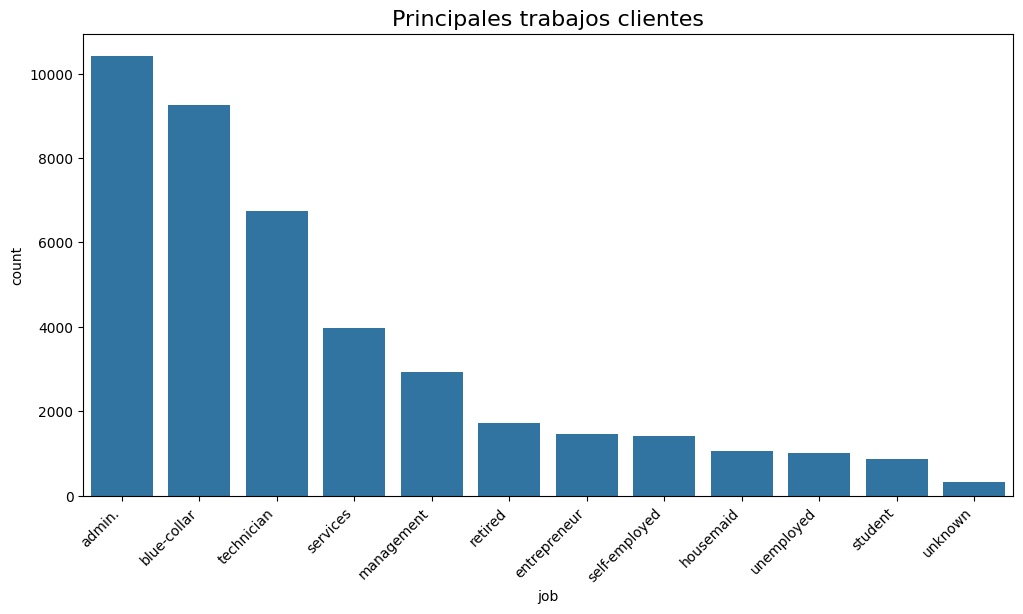

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [145]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Principales trabajos clientes', fontsize=16)
plt.show()

df.job.value_counts()


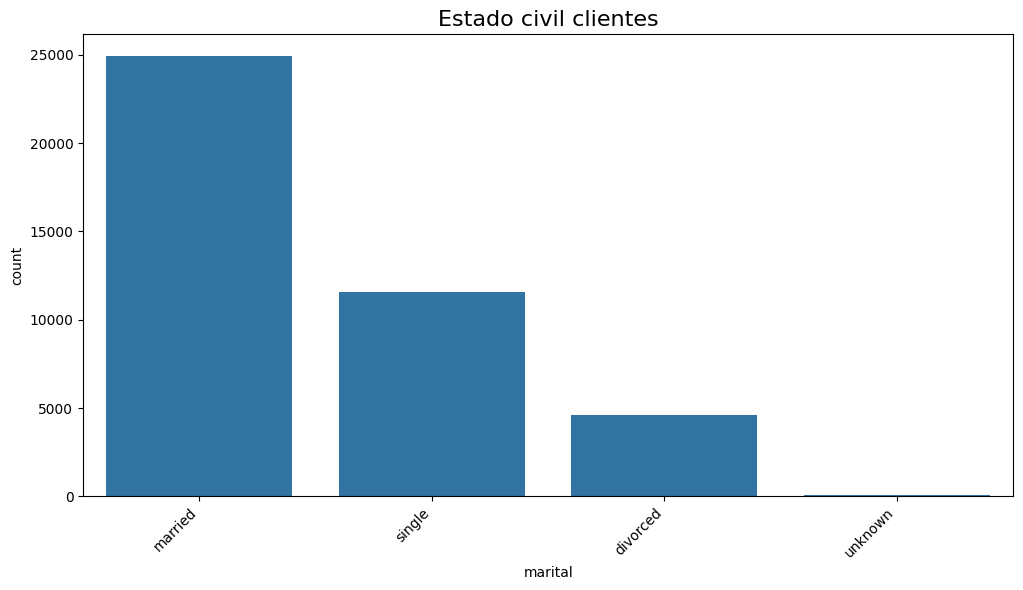

si bien la columna marital tiene 80 datos desconocidos, considero no eliminarla


marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [146]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Estado civil clientes', fontsize=16)
plt.show()
print("si bien la columna marital tiene 80 datos desconocidos, considero no eliminarla")
df.marital.value_counts()

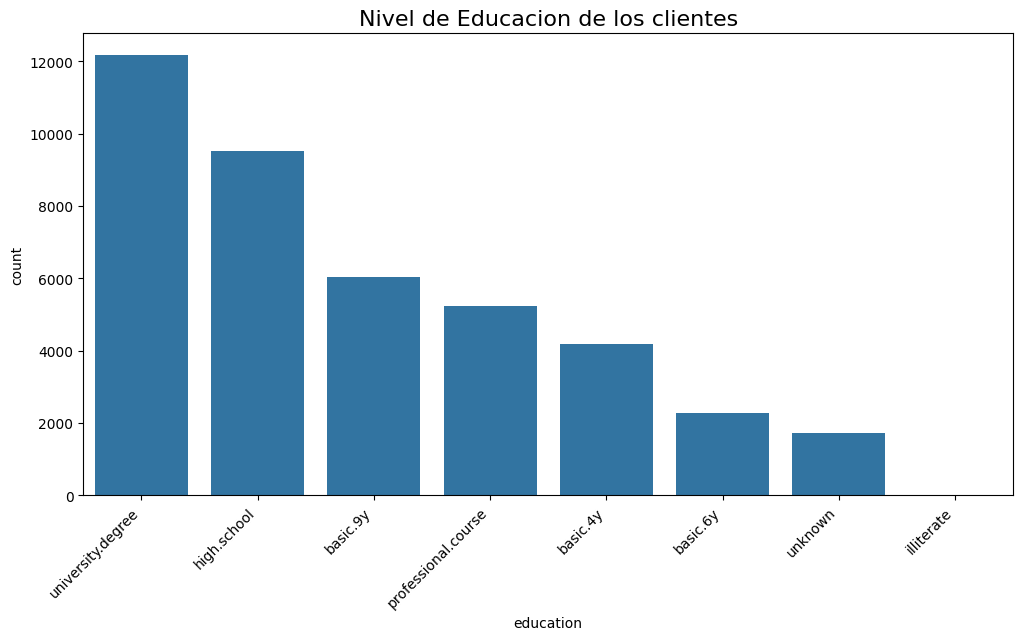

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [147]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='education', order=df['education'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Nivel de Educacion de los clientes', fontsize=16)
plt.show()

df.education.value_counts()

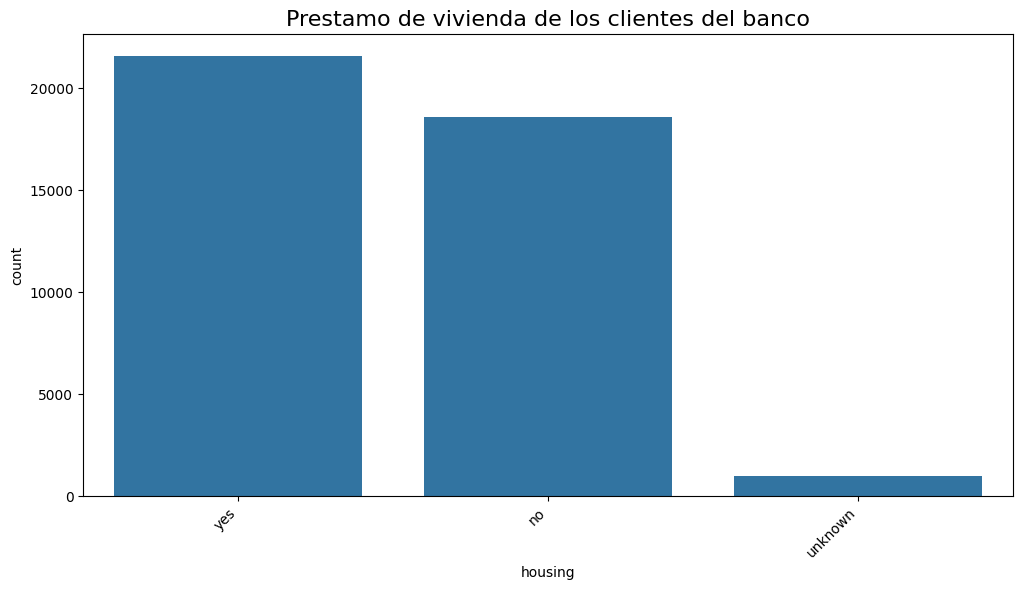

si bien la columna housing tiene 990 datos desconocidos, considero no eliminarla ni inmutarla


housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [148]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Prestamo de vivienda de los clientes del banco', fontsize=16)
plt.show()
print("si bien la columna housing tiene 990 datos desconocidos, considero no eliminarla ni inmutarla")

df.housing.value_counts()

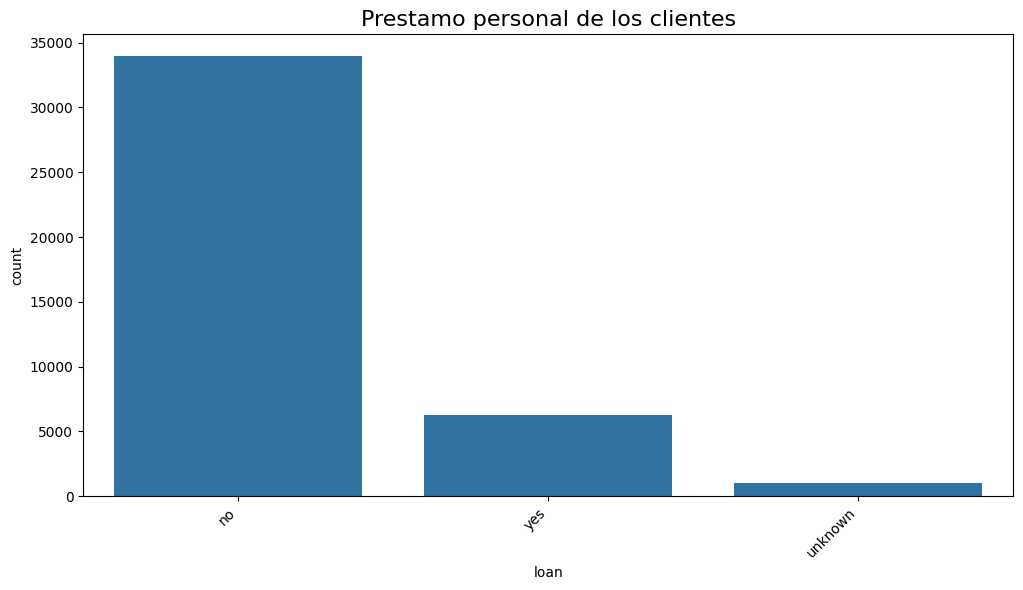

si bien la columna loan tiene 990 datos desconocidos, considero no eliminarla ni inmutarla


loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [149]:
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x='loan', order=df['loan'].value_counts().index)
plt.xticks(rotation=45, ha='right', fontsize=10) 

plt.title('Prestamo personal de los clientes', fontsize=16)
plt.show()
print("si bien la columna loan tiene 990 datos desconocidos, considero no eliminarla ni inmutarla")

df.loan.value_counts()

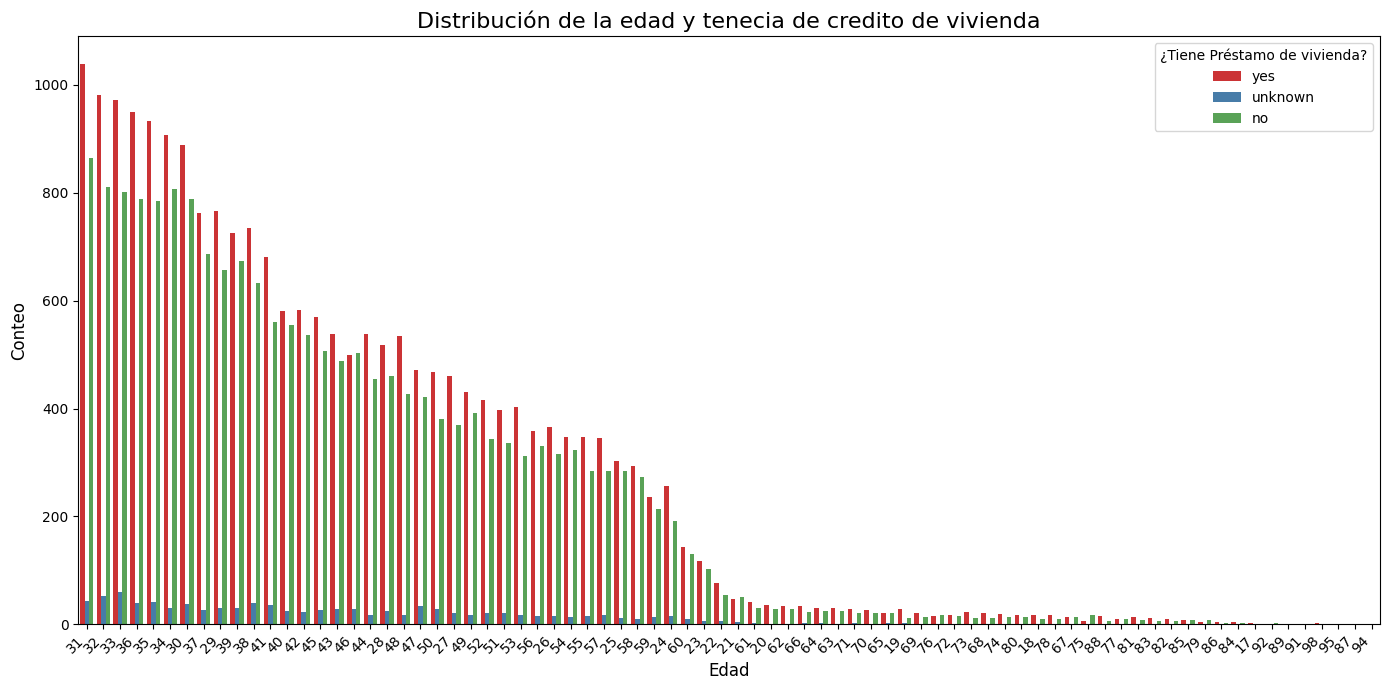

Mienstras mas joven, menos credito de vivienda y la mayoria de cleintes con credito de vivienda esta en la edad de 31 a 45 años


In [150]:
#Analisis Multivariable

#Solo numericas Edad y duracion de contacto en segundos

plt.figure(figsize=(14, 7)) 

sns.countplot(data=df, x='age', hue='housing',palette='Set1', order=df['age'].value_counts().index ) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Distribución de la edad y tenecia de credito de vivienda', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(title='¿Tiene Préstamo de vivienda?') 
plt.tight_layout()
plt.show()

print ("Mienstras mas joven, menos credito de vivienda y la mayoria de cleintes con credito de vivienda esta en la edad de 31 a 45 años")


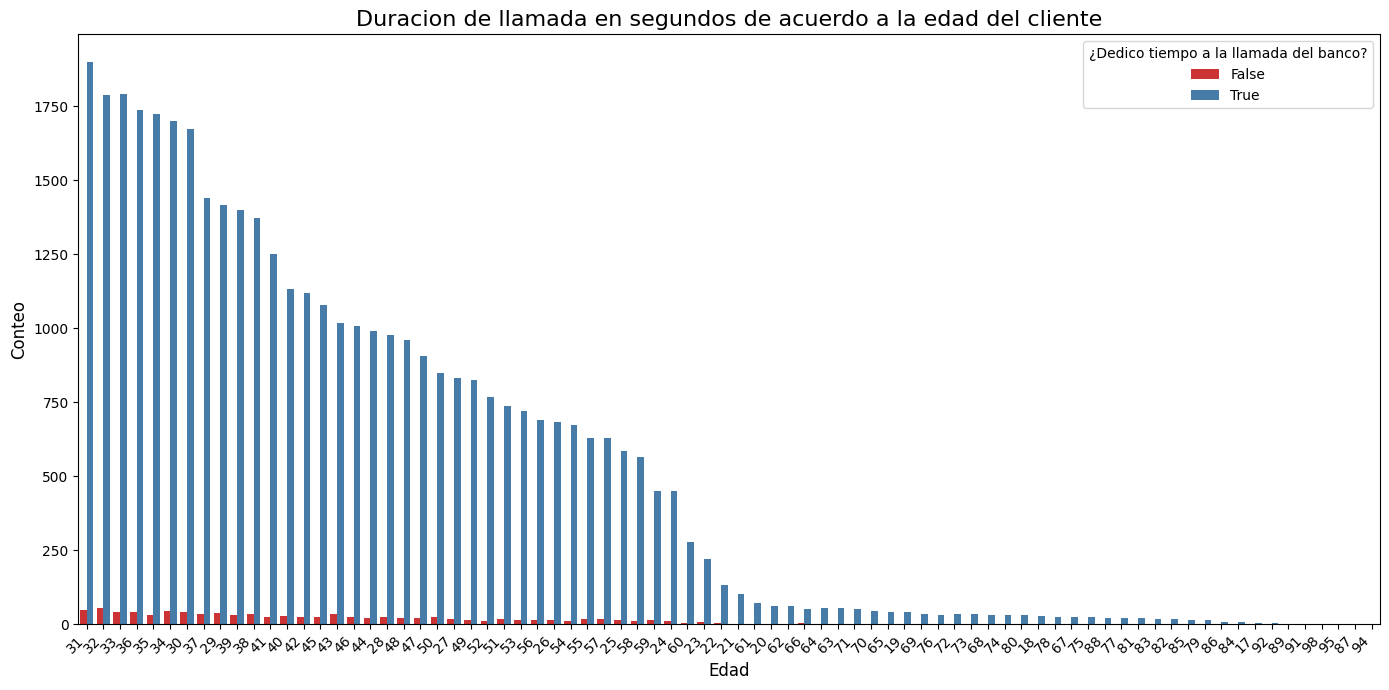

Los clientes entre las edades de 31 años hasta los 45 son mas abiertos en brindar segundos a las llamadas del banco


In [151]:
plt.figure(figsize=(14, 7)) 
sns.countplot(data=df, x='age', hue=(df["duration"] <= 1000),palette='Set1', order=df['age'].value_counts().index ) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Duracion de llamada en segundos de acuerdo a la edad del cliente', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(title='¿Dedico tiempo a la llamada del banco?') 
plt.tight_layout()
plt.show()

print("Los clientes entre las edades de 31 años hasta los 45 son mas abiertos en brindar segundos a las llamadas del banco")

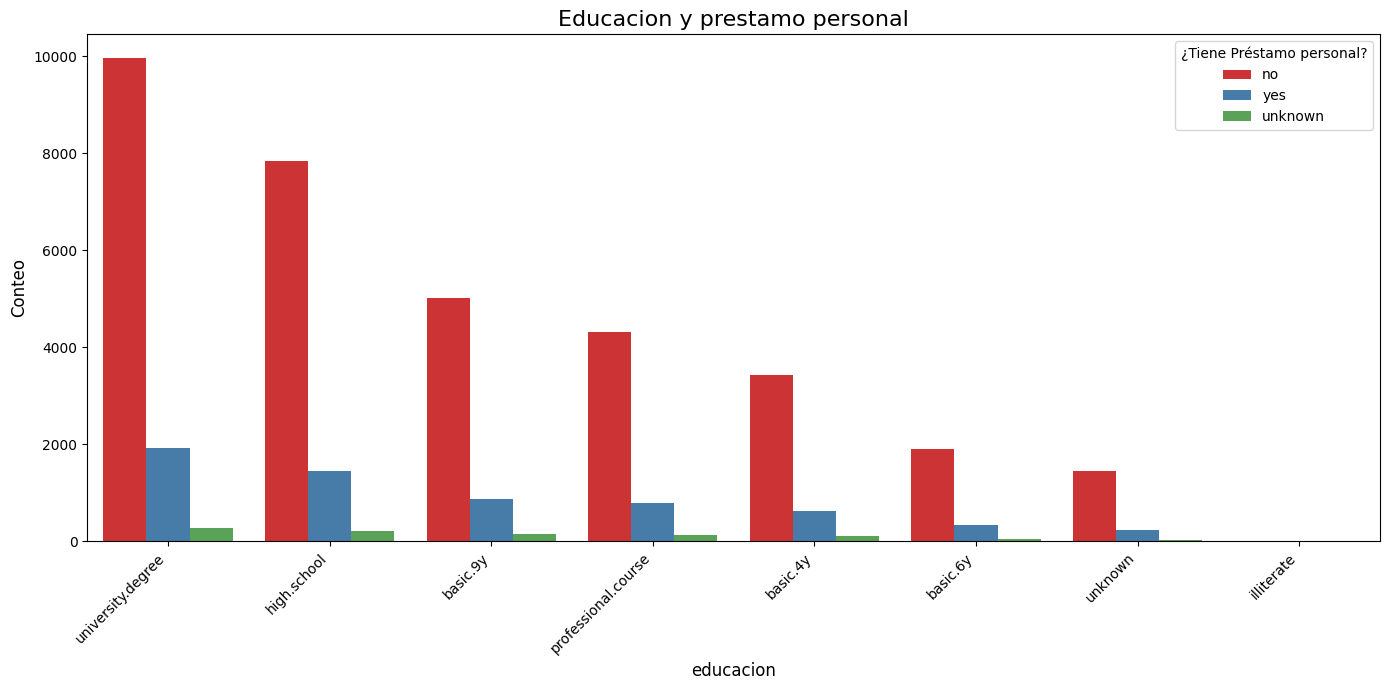

In [152]:
plt.figure(figsize=(14, 7)) 

sns.countplot(data=df, x='education', hue='loan',palette='Set1', order=df['education'].value_counts().index ) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Educacion y prestamo personal', fontsize=16)
plt.xlabel('educacion', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(title='¿Tiene Préstamo personal?') 
plt.tight_layout()
plt.show()




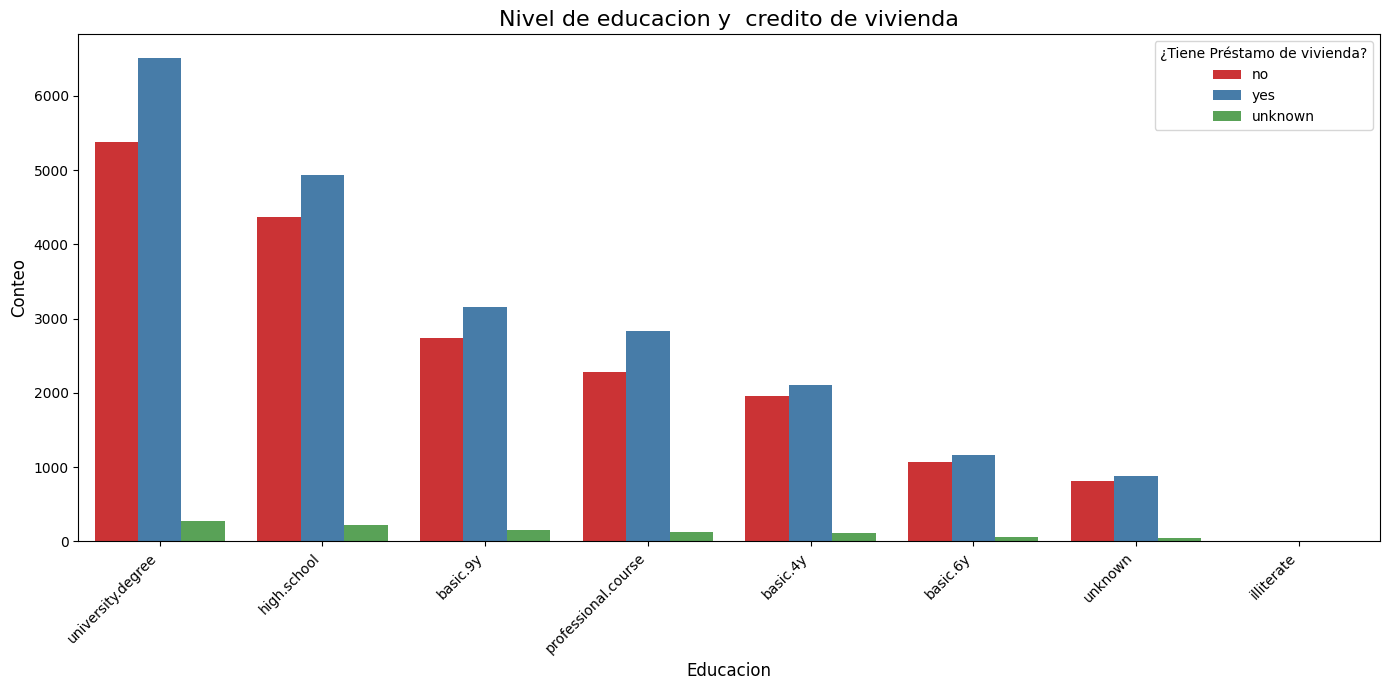

Los clientes con mayor educacion tienen mas credito de vivienda


In [153]:
plt.figure(figsize=(14, 7)) 
sns.countplot(data=df, x='education', hue='housing',palette='Set1', order=df['education'].value_counts().index ) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Nivel de educacion y  credito de vivienda', fontsize=16)
plt.xlabel('Educacion', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(title='¿Tiene Préstamo de vivienda?') 
plt.tight_layout()
plt.show()

print("Los clientes con mayor educacion tienen mas credito de vivienda")

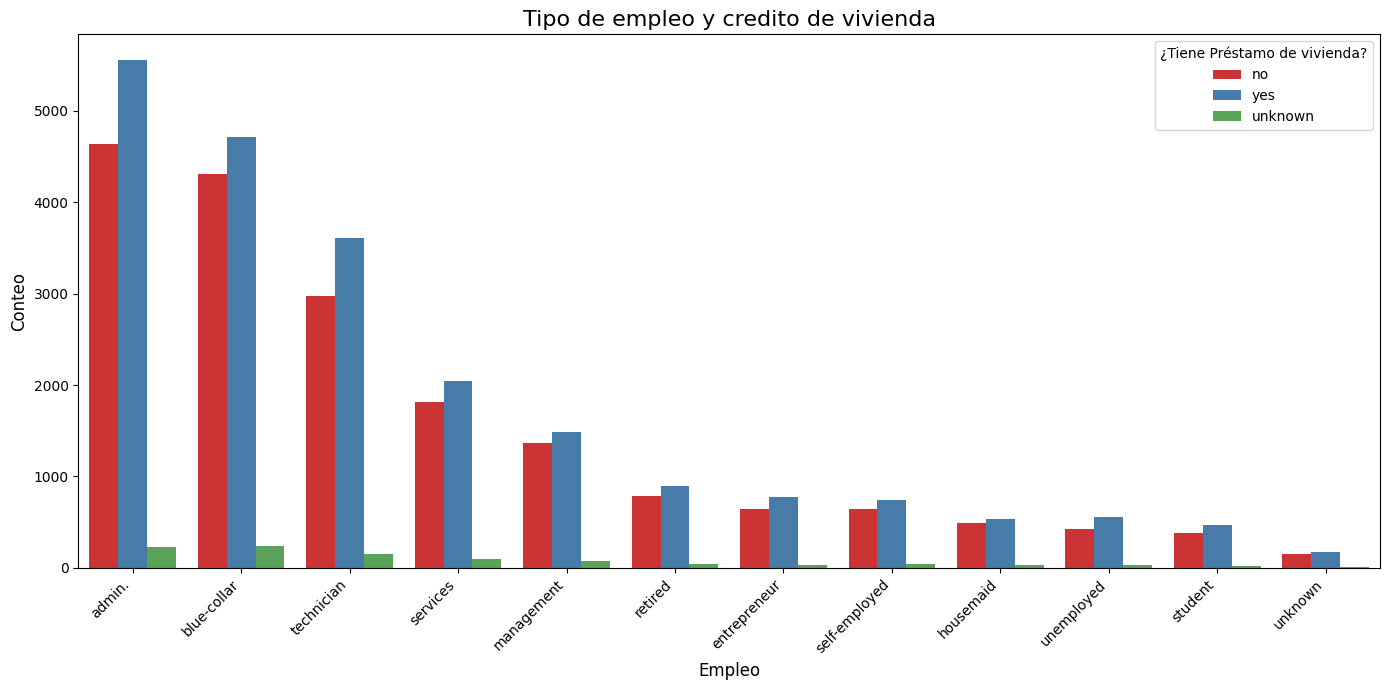

In [154]:
plt.figure(figsize=(14, 7)) 
sns.countplot(data=df, x='job', hue='housing',palette='Set1', order=df['job'].value_counts().index ) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Tipo de empleo y credito de vivienda', fontsize=16)
plt.xlabel('Empleo', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(title='¿Tiene Préstamo de vivienda?') 
plt.tight_layout()
plt.show()


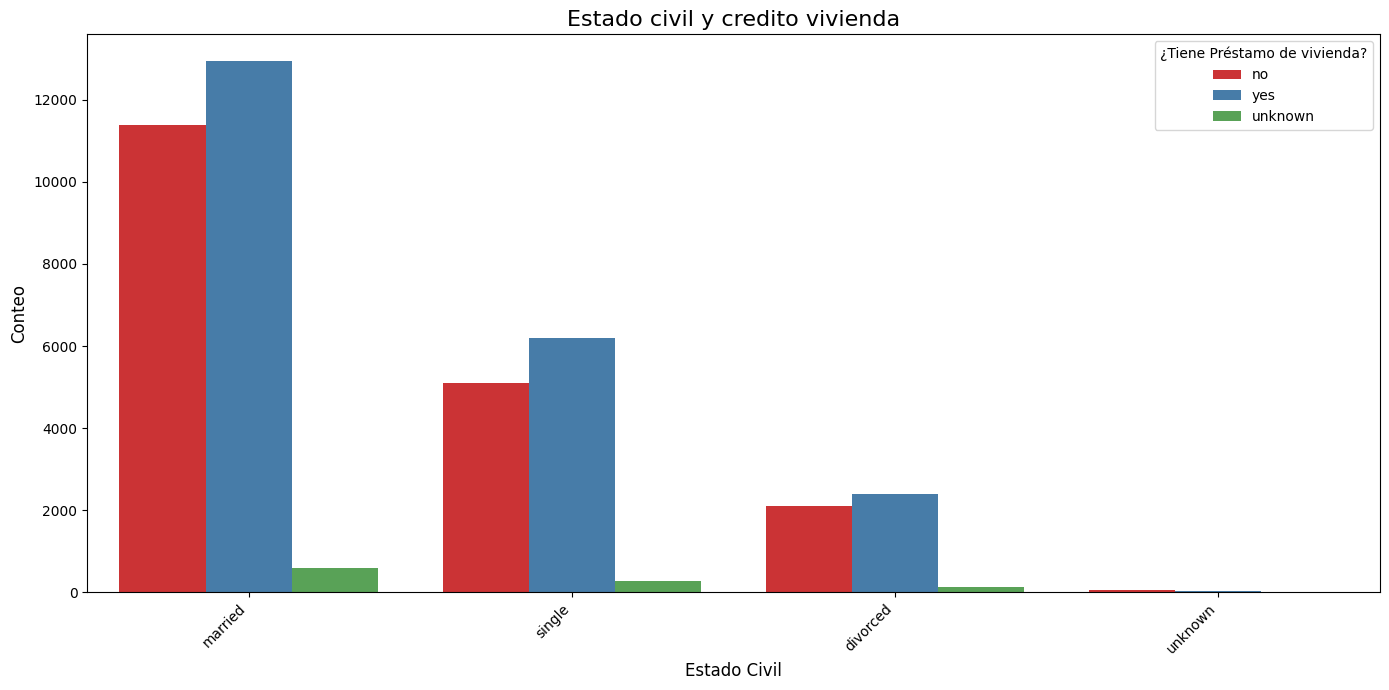

In [155]:
plt.figure(figsize=(14, 7)) 
sns.countplot(data=df, x='marital', hue='housing',palette='Set1', order=df['marital'].value_counts().index ) 
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.title('Estado civil y credito vivienda', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('Conteo', fontsize=12)
plt.legend(title='¿Tiene Préstamo de vivienda?') 
plt.tight_layout()
plt.show()

In [156]:
#Eliminacion de Outliers de variables numericas

#Edad
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1a = df['age'].quantile(0.25)
Q3a = df['age'].quantile(0.75)
IQRa = Q3a - Q1a

# Definir los límites inferior y superior
lower_limita = Q1a - 1.5 * IQRa
upper_limita = Q3a + 3 * IQRa

#Duration - Duracion de llamada en segundos
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1d = df['duration'].quantile(0.25)
Q3d = df['duration'].quantile(0.75)
IQRd = Q3d - Q1d

# Definir los límites inferior y superior
lower_limitd = Q1d 
upper_limitd = Q3d + 1.5 * IQRd

print(f"Los límites superior e inferior para la búsqueda de outliers de la edad son {round(upper_limita, 2)} y {round(lower_limita, 2)}, con un rango intercuartílico de {round(IQRa, 2)}")
print(f"Los límites superior e inferior para la búsqueda de outliers de la duracion de la llamada son {round(upper_limitd, 2)} y {round(lower_limitd, 2)}, con un rango intercuartílico de {round(IQRd, 2)}")

Los límites superior e inferior para la búsqueda de outliers de la edad son 92.0 y 9.5, con un rango intercuartílico de 15.0
Los límites superior e inferior para la búsqueda de outliers de la duracion de la llamada son 644.5 y 102.0, con un rango intercuartílico de 217.0


In [157]:
df.isnull().sum().sort_values(ascending=False)


age          0
job          0
marital      0
education    0
housing      0
loan         0
duration     0
y            0
dtype: int64

In [158]:
# Creo un dataframe filtrado sin outliers de variables numericas

# DataFrame sin los valores atípicos
df = df[
    (df['age'] >= lower_limita) &
    (df['age'] <= upper_limita) &
    (df['duration'] >= lower_limitd) &
    (df['duration'] <= upper_limitd)
]

df.shape

(28041, 8)

In [159]:
#Factorizacion de variables categoricas

df["credito_vivienda"] = pd.factorize(df["housing"])[0]
df["credito_personal"] = pd.factorize(df["loan"])[0]
df["tipo_trabajo"] = pd.factorize(df["job"])[0]
df["estado_civil"] = pd.factorize(df["marital"])[0]
df["nivel_educacion"] = pd.factorize(df["education"])[0]
df["contratacion_poliza"] = pd.factorize(df["y"])[0]

print("se factoriza las variables categoricas con el fin de hacer mapa de calor y ver relacion entre ellas")

df.head()


se factoriza las variables categoricas con el fin de hacer mapa de calor y ver relacion entre ellas


,age,job,marital,education,housing,loan,duration,y,credito_vivienda,credito_personal,tipo_trabajo,estado_civil,nivel_educacion,contratacion_poliza
0,56,housemaid,married,basic.4y,no,no,261,no,0,0,0,0,0,0
1,57,services,married,high.school,no,no,149,no,0,0,1,0,1,0
2,37,services,married,high.school,yes,no,226,no,1,0,1,0,1,0
3,40,admin.,married,basic.6y,no,no,151,no,0,0,2,0,2,0
4,56,services,married,high.school,no,yes,307,no,0,1,1,0,1,0


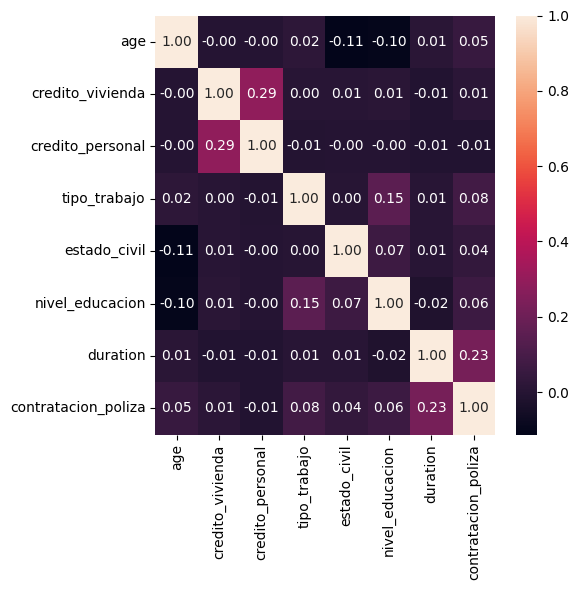

El mapa de calor no muestra una relacion entre las variables


In [160]:
# Mapa de Calor 

fig, axes = plt.subplots(figsize = (6, 6))

sns.heatmap(df[["age", "credito_vivienda", "credito_personal", "tipo_trabajo", "estado_civil", "nivel_educacion", "duration", "contratacion_poliza"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

print ("El mapa de calor no muestra una relacion entre las variables")

In [161]:
# Prueba Chi Cuadrado para variable categorica nominal de estado civil y contratacion deposito a largo plazo 

#H0= No existe relacion entre el estado civil y contratacion deposito a largo plazo
#H1= Existe relacion entre el estado civil y contratacion deposito a largo plazo 

tabla_contingencia = pd.crosstab(df['education'], df['y'])

print("Tabla de Contingencia (Frecuencias Observadas):")
print(tabla_contingencia)
print("-" * 50)

chi2, p_valor, grados_libertad, frecuencias_esperadas = chi2_contingency(tabla_contingencia)

print(f"Estadístico Chi Cuadrado (χ²): {chi2:.4f}")
print(f"Grados de Libertad (dof): {grados_libertad}")
print(f"Valor p (P-value): {p_valor:.4f}")
alfa = 0.05

if p_valor < 0.05:
    print("Se rechaza Hipotesis Nula, si hay relacion entre las variables")
else:
    print("Se acepta la Hipitesis Nula, las variables son independientes")


Tabla de Contingencia (Frecuencias Observadas):
y                      no   yes
education                      
basic.4y             2632   299
basic.6y             1470    90
basic.9y             3882   243
high.school          5867   643
illiterate              9     3
professional.course  3105   401
university.degree    7042  1166
unknown              1008   181
--------------------------------------------------
Estadístico Chi Cuadrado (χ²): 278.1687
Grados de Libertad (dof): 7
Valor p (P-value): 0.0000
Se rechaza Hipotesis Nula, si hay relacion entre las variables


In [162]:
#Prueba t Student entre variable binaria Y (contratacion de deposito a largo plazo) y una numerica edad para confirmar hipotesis

#H0= las variables no tienen relacion
#H1 = las variables si tienen relacion entre si 

# Se crea dos variables numericas según la binaria
grupo_si = df[df['y'] == 'yes']['age']
grupo_no = df[df['y'] == 'no']['age']

resultado_t_test = stats.ttest_ind(grupo_si, grupo_no, equal_var=False) 
t_stat = resultado_t_test.statistic
p_valor = resultado_t_test.pvalue

alfa = 0.05

print(f"Media de Edad (Préstamo SÍ): {grupo_si.mean():.2f}")
print(f"Media de Edad (Préstamo NO): {grupo_no.mean():.2f}")
print("-" * 40)
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p (P-value): {p_valor:.4f}")

if p_valor < alfa:
    print("Se rechaza H₀: Si hay relacion significativa entre las variables")
    
else:
    print("No se rechaza H₀ No hay una relación significativa entre la edad y la contratación del depósito a largo plazo:")


Media de Edad (Préstamo SÍ): 41.54
Media de Edad (Préstamo NO): 39.89
----------------------------------------
Estadístico t: 5.9073
Valor p (P-value): 0.0000
Se rechaza H₀: Si hay relacion significativa entre las variables


In [163]:
#Prueba t Student entre variable binaria Y y una numerica duration para confirmar hipotesis


# Se crea dos variables numericas según la binaria
grupo_si = df[df['y'] == 'yes']['duration']
grupo_no = df[df['y'] == 'no']['duration']

resultado_t_test = stats.ttest_ind(grupo_si, grupo_no, equal_var=False) 
t_stat = resultado_t_test.statistic
p_valor = resultado_t_test.pvalue

alfa = 0.05

print(f"Media de duracion segundos (Préstamo SÍ): {grupo_si.mean():.2f}")
print(f"Media de duracion de segundos (Préstamo NO): {grupo_no.mean():.2f}")
print("-" * 40)
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p (P-value): {p_valor:.4f}")

if p_valor < alfa:
    print("Se rechaza H₀: Si hay relacion entre las variables")
else:
    print("No se rechaza H₀: No hay relacion entre las variables")

Media de duracion segundos (Préstamo SÍ): 338.82
Media de duracion de segundos (Préstamo NO): 244.26
----------------------------------------
Estadístico t: 33.7305
Valor p (P-value): 0.0000
Se rechaza H₀: Si hay relacion entre las variables


In [164]:
#CONCLUSIONES Preliminares

print("1.Con la prueba Chi al cuadradno  se determino relacion entre las variable categorica estado civil y la contratacion de deposito a largo plazo")
print("2.Con la t-student se determino relacion entre las variables numericas edad y duracion de llamada en segundos\ncon la variable 'y' indicando relacion")
print("3.Se podria establecer que la variable 'y' de colocacion de depositos a largo plazo tiene relacion con otras variables,\nse establece como variable dependiente para el modelo")

1.Con la prueba Chi al cuadradno  se determino relacion entre las variable categorica estado civil y la contratacion de deposito a largo plazo
2.Con la t-student se determino relacion entre las variables numericas edad y duracion de llamada en segundos
con la variable 'y' indicando relacion
3.Se podria establecer que la variable 'y' de colocacion de depositos a largo plazo tiene relacion con otras variables,
se establece como variable dependiente para el modelo


SPLIT Y ENTRENAMIENTO DE DATOS

In [165]:
#Se limpia DF de variables factorizadas
df.drop(["credito_vivienda", "credito_personal", "tipo_trabajo", "estado_civil", "nivel_educacion", "contratacion_poliza"], axis = 1, inplace = True)
df.head()

,age,job,marital,education,housing,loan,duration,y
0,56,housemaid,married,basic.4y,no,no,261,no
1,57,services,married,high.school,no,no,149,no
2,37,services,married,high.school,yes,no,226,no
3,40,admin.,married,basic.6y,no,no,151,no
4,56,services,married,high.school,no,yes,307,no


In [166]:
#Se divide los datos de entrenamiento
X = df.drop("y", axis = 1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,age,job,marital,education,housing,loan,duration
31810,28,technician,single,basic.9y,yes,no,263
24288,45,admin.,married,basic.9y,yes,no,591
25278,54,admin.,married,basic.4y,yes,no,127
40120,66,retired,married,high.school,no,no,475
21217,33,admin.,married,university.degree,yes,no,315


In [167]:
#Identificacion de variables por tipo
variables_numericas = ['age','duration']
variables_categoricas = ['job', 'marital','education','loan', 'duration']


In [168]:
#ESCALADO 

# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[variables_numericas])

# aplico el escalador en train y test
X_train_num_scal = scaler.transform(X_train[variables_numericas])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = variables_numericas)

X_test_num_scal = scaler.transform(X_test[variables_numericas])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = variables_numericas)

X_train_num_scal.head()


,age,duration
31810,-1.142356,0.067261
24288,0.464331,2.579433
25278,1.314929,-0.974371
40120,2.449060,1.690982
21217,-0.669801,0.465532


In [169]:
#CODIFICACION A VARIABLES CATEGORICAS BINARIAS Y ORDINALES CON LABELENCODER

# Creamos DataFrames de trabajo (es buena práctica no modificar X_train directamente)
X_train_cod = X_train.copy()
X_test_cod = X_test.copy()

# CODIFICACIÓN BINARIA a variable loan

loan_mapping = {'no': 0, 'yes': 1} # Se define a variable binaria loan
X_train_cod['loan_cod'] = X_train_cod['loan'].map(loan_mapping)
X_test_cod['loan_cod'] = X_test_cod['loan'].map(loan_mapping)

# CODIFICACIÓN BINARIA a variable Housing

housing_mapping = {'no': 0, 'yes': 1} # Se define a variable binaria housing
X_train_cod['housing_cod'] = X_train_cod['housing'].map(housing_mapping)
X_test_cod['housing_cod'] = X_test_cod['housing'].map(housing_mapping)


#CODIFICACIÓN ORDINAL: 'education' (Usando LabelEncoder)

# Instanciar el encoder
le_education = LabelEncoder()

# A. ENTRENAR (FIT) solo con los datos de entrenamiento
le_education.fit(X_train_cod['education'])

# B. TRANSFORMAR X_train y X_test usando el encoder ENTRENADO
X_train_cod['education_cod'] = le_education.transform(X_train_cod['education'])
X_test_cod['education_cod'] = le_education.transform(X_test_cod['education'])

print("Asignaciones de LabelEncoder para 'education':")
for i, label in enumerate(le_education.classes_):
    print(f"'{label}' -> {i}")

#ELIMINAR COLUMNAS ORIGINALES

X_train_final_le= X_train_cod.drop(columns=['education', 'loan', 'housing'])
X_test_final_le= X_test_cod.drop(columns=['education', 'loan', 'housing'])

print("\nPrimeras filas del conjunto de entrenamiento final (con columnas codificadas):")
print(X_train_final_le[['education_cod', 'loan_cod', 'housing_cod']].head())

Asignaciones de LabelEncoder para 'education':
'basic.4y' -> 0
'basic.6y' -> 1
'basic.9y' -> 2
'high.school' -> 3
'illiterate' -> 4
'professional.course' -> 5
'university.degree' -> 6
'unknown' -> 7

Primeras filas del conjunto de entrenamiento final (con columnas codificadas):
       education_cod  loan_cod  housing_cod
31810              2       0.0          1.0
24288              2       0.0          1.0
25278              0       0.0          1.0
40120              3       0.0          0.0
21217              6       0.0          1.0


In [170]:
#CODIFICACION VARIABLES CATEGORICAS NOMINAL - ONE HOT ENCODING

variables_nominales= ['job', 'marital']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_nom_ohe = ohe.fit_transform(X_train[variables_nominales])
X_test_nom_ohe = ohe.transform(X_test[variables_nominales]) 

#Se recupera el dataframe porque estaba en formato numpy

nombres_columnas_ohe = ohe.get_feature_names_out(variables_nominales)

#Reconstruir X_train
X_train_ohe_df = pd.DataFrame(X_train_nom_ohe,columns=nombres_columnas_ohe,index=X_train.index)

#Reconstruir X_test
X_test_ohe_df = pd.DataFrame(X_test_nom_ohe,columns=nombres_columnas_ohe,index=X_test.index)

X_train_ohe_df.head()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown
31810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
24288,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25278,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40120,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21217,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [171]:
#Concatenación Final 

X_train_final = pd.concat([X_train_num_scal, X_train_ohe_df, X_train_final_le[['loan_cod', 'education_cod', 'housing_cod']]], axis=1)
X_test_final = pd.concat([X_test_num_scal, X_test_ohe_df, X_test_final_le[['loan_cod', 'education_cod', 'housing_cod']]], axis=1)

# Eliminamos posibles valores faltantes (por seguridad)
X_train_final = X_train_final.fillna(0)
X_test_final = X_test_final.fillna(0)


# Confirmación
print("Columnas finales:", X_train_final.shape[1])
print("Coincidencia de filas:", X_train_final.shape[0] == y_train.shape[0])

Columnas finales: 21
Coincidencia de filas: True


ENTRENAMIENTO DEL MODELO REGRESION LOGISTICA

In [172]:
# instanciacion
model = LogisticRegression(max_iter=1000, random_state=42)

# entrenamiento
model.fit(X_train_final, y_train)

# Predicciones
y_pred = model.predict(X_test_final)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.8905330718488144

Matriz de confusión:
 [[4967   39]
 [ 575   28]]

Reporte de clasificación:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      5006
         yes       0.42      0.05      0.08       603

    accuracy                           0.89      5609
   macro avg       0.66      0.52      0.51      5609
weighted avg       0.84      0.89      0.85      5609



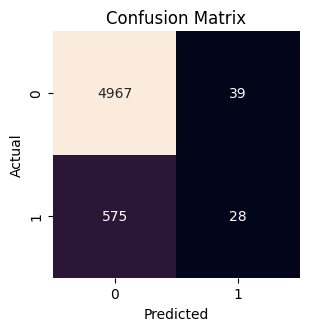

In [173]:
# MATRIZ DE CONFUSION

titanic_cm = confusion_matrix(y_test, y_pred)
titanic_cm

# MEJOR VISUALIZACION
cm_df = pd.DataFrame(titanic_cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [175]:
print("El modelo predijo positivos verdadeos 4967 y falsos positivos 39\n Negativos verdaderos 28 y falsos negativos son 575, muy alto\npor lo tanto el modelo presenta errores, pudiendo dejar excluidos de la campañan de marketing a clientes si estarian dispuestos a contratar deposito a largo plazo")

El modelo predijo positivos verdadeos 4967 y falsos positivos 39
 Negativos verdaderos 28 y falsos negativos son 575, muy alto
por lo tanto el modelo presenta errores, pudiendo dejar excluidos de la campañan de marketing a clientes si estarian dispuestos a contratar deposito a largo plazo


In [176]:
# OPTIMIZACION DE RESULTADOS 

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


In [ ]:
#Definimos Parametros para mejorar

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

,estimator,LogisticRegre...ndom_state=42)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [94]:
grid.fit(X_train_final, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [98]:
#Reentrenamos el modelo

model_grid = LogisticRegression(penalty = "l2", C = 1, solver = "liblinear")
model_grid.fit(X_train_final, y_train)
y_pred = model_grid.predict(X_test_final)

print("No hay mejora del modelo")

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

No hay mejora del modelo


0.8903547869495454

In [178]:
#CONCLUSION

print("La variable dependiente Y sobre contratacion de deposito a largo plazo, funciona. Es decir, se puede aplicar el plan de marketing para el grupo de clientes\nque han contestado si. En este caso seria a un grupo de  4.639 clientes")
print("El modelo de Regresion Logistica brinda un accuracy de 0.8903 con parametro mejorados, sin embargo, presenta muchos faltos negativos, por lo que\n puede dejar afuera de la campaña de marketing a clientes que si estarian dispuetos a contratar el deposito a largo plazo")


La variable dependiente Y sobre contratacion de deposito a largo plazo, funciona. Es decir, se puede aplicar el plan de marketing para el grupo de clientes
que han contestado si. En este caso seria a un grupo de  4.639 clientes
El modelo de Regresion Logistica brinda un accuracy de 0.8903 con parametro mejorados, sin embargo, presenta muchos faltos negativos, por lo que
 puede dejar afuera de la campaña de marketing a clientes que si estarian dispuetos a contratar el deposito a largo plazo
